In [ ]:
!pip install phik

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Dataset/parkinsons.data.csv"
Registros = pd.read_csv(path)

Registros

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
print(Registros.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

In [ ]:
import phik
from phik import  resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import LabelEncoder
import networkx as nx

interval columns not set, guessing: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


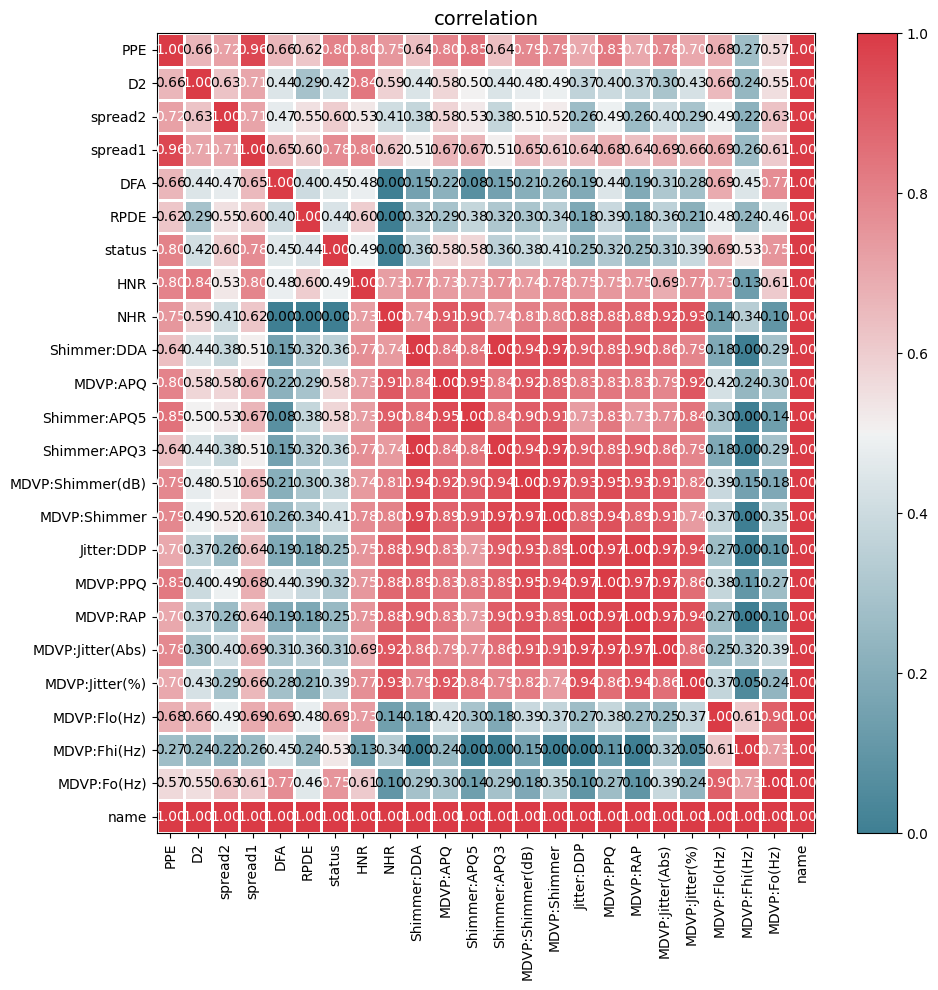

In [ ]:
correc_mat = Registros.phik_matrix()
cma = sns.diverging_palette(220, 10, as_cmap= True)

plot_correlation_matrix(correc_mat.values, x_labels=correc_mat.columns, y_labels=correc_mat.index, vmin = 0, vmax = 1, color_map=cma, figsize=(10,10))

# **RANDOM FOREST**

In [ ]:
Categorias = np.unique(Registros['status'].values)
X = Registros.drop(columns=['status', 'name']).values
Y = Registros['status'].values
ColumnasX = Registros.drop(columns=['status', 'name']).columns.tolist()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size= 0.3, random_state= 5, stratify= Y)

X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.5, random_state= 5, stratify= y_train)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1)

# Entrenar el clasificador con los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de Entrenamiento
y_pred = rf_classifier.predict(X_train)

# Hacer predicciones en el conjunto de prueba
y_test_pred = rf_classifier.predict(x_test)

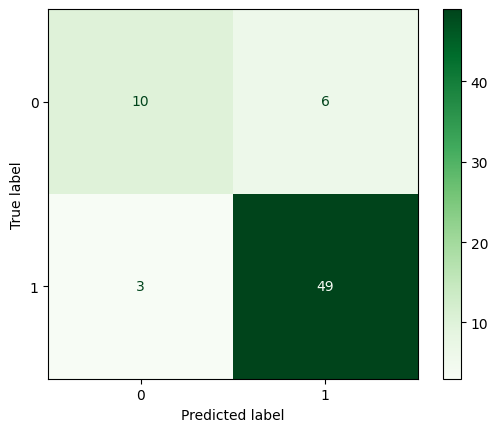

In [ ]:
mc = confusion_matrix(y_test,y_test_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=Categorias)
disp.plot(cmap=plt.cm.Greens)

In [ ]:
# Calcular la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Precisión en el conjunto de Prueba:", accuracy_test)

# Calcular la precisión en el conjunto de Entrenamiento
accuracy = accuracy_score(y_train, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

Precisión en el conjunto de Prueba: 0.8676470588235294
Precisión del modelo Random Forest: 0.9705882352941176


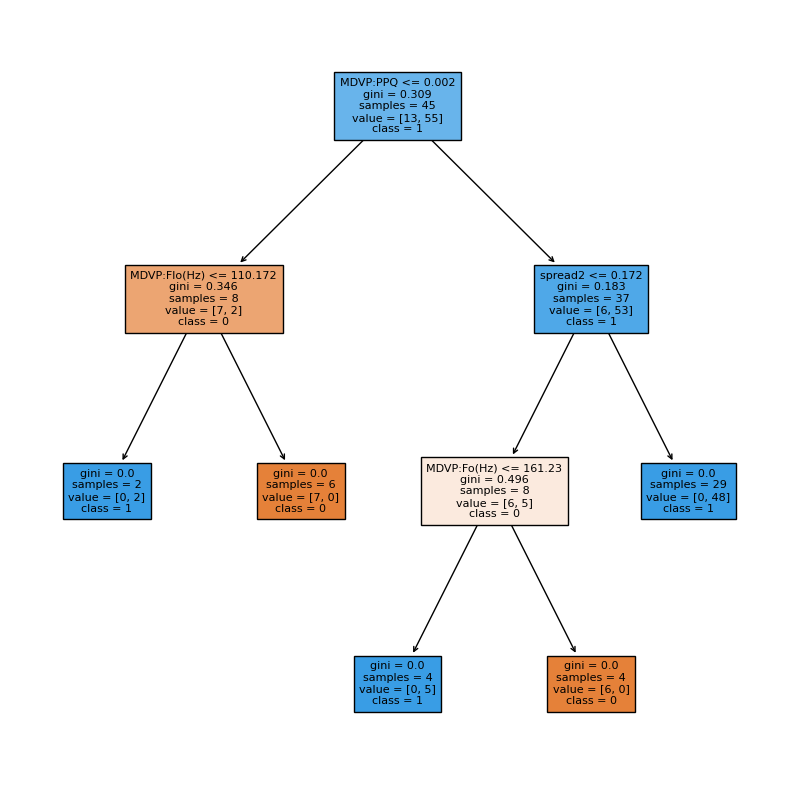

In [ ]:
clasesLabel1 = [str(label) for label in np.unique(Y)]
# Visualizar el primer árbol del Random Forest con una profundidad limitada
plt.figure(figsize=(10, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=ColumnasX, class_names=clasesLabel1, filled=True, fontsize=8, max_depth=3)
plt.show()

# **Mejores Hiperparametros**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search1 = GridSearchCV(estimator=rf_classifier, param_grid={'n_estimators': [50,100, 200, 300], 'max_depth': [None, 10, 20,30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]})

grid_search1.fit(X_val, y_val)


GridSearchCV(estimator=RandomForestClassifier(max_depth=10, min_samples_split=5,
                                              n_estimators=50),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

Despues de hacer la ejecución del fine-tuning nos da que los mejores parametros son max_depth=10, min_samples_split=5, n_estimators=50 , los mismos que tenemos en la ejecucion inicial donde se obtiene una muy buena precision, los mejores hiperparametros son pequeños ya que con un dataset pequeño se mejora el control de las relaciones y  tener valores mas altos aumenta la complejidad del entrenamiento y puede haber un sobre ajuste